In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
users_data = pd.read_csv('data/users_data.csv')
gym_locations_data = pd.read_csv('data/gym_locations_data.csv')
checkin_checkout_history = pd.read_csv('data/checkin_checkout_history_updated.csv')
subscription_plans = pd.read_csv('data/subscription_plans.csv')

In [3]:
# Display the first few rows of each dataset to understand their structure
print("Users Data:")
print(users_data.head(), "\n")

print("Gym Locations Data:")
print(gym_locations_data.head(), "\n")

print("Check-in/Checkout History:")
print(checkin_checkout_history.head(), "\n")

print("Subscription Plans:")
print(subscription_plans.head(), "\n")

Users Data:
  user_id first_name last_name  age      gender   birthdate sign_up_date  \
0  user_1      Chris    Wilson   56      Female  2000-02-29   2023-02-06   
1  user_2    Michael    Miller   46  Non-binary  1978-12-22   2023-08-08   
2  user_3     Daniel     Smith   32      Female  1962-08-30   2021-01-11   
3  user_4      David     Smith   60        Male  2003-12-05   2023-08-07   
4  user_5      Chris     Jones   25      Female  2004-08-25   2021-01-08   

  user_location subscription_plan  
0        Denver             Basic  
1       Orlando               Pro  
2       Orlando             Basic  
3        Denver               Pro  
4        Denver             Basic   

Gym Locations Data:
  gym_id     location  gym_type  \
0  gym_1     New York   Premium   
1  gym_2  Los Angeles    Budget   
2  gym_3      Chicago    Budget   
3  gym_4      Houston   Premium   
4  gym_5      Phoenix  Standard   

                                       facilities  
0  Climbing Wall, Swimming Poo

In [4]:
# Merge datasets for deeper analysis
# Merge check-ins with user data
checkin_user_data = checkin_checkout_history.merge(users_data, on='user_id')
# Merge the resulting data with gym locations
full_data = checkin_user_data.merge(gym_locations_data, on='gym_id')

In [5]:
# Display merged dataset
print("Merged Data:")
print(full_data.head(), "\n")

Merged Data:
     user_id  gym_id         checkin_time        checkout_time   workout_type  \
0  user_3291   gym_6  2023-09-10 15:55:00  2023-09-10 16:34:00  Weightlifting   
1  user_1944   gym_2  2023-04-13 20:07:00  2023-04-13 22:43:00           Yoga   
2   user_958   gym_7  2023-06-10 12:24:00  2023-06-10 13:49:00         Cardio   
3   user_811   gym_2  2023-05-23 17:11:00  2023-05-23 20:01:00           Yoga   
4  user_4923  gym_10  2023-02-21 06:20:00  2023-02-21 08:02:00  Weightlifting   

   calories_burned first_name  last_name  age  gender   birthdate  \
0              462    Michael  Rodriguez   41  Female  1998-03-10   
1             1278    Michael     Garcia   24  Female  1985-11-28   
2              858      Emily  Rodriguez   37    Male  1986-03-12   
3             1134      David     Miller   34  Female  1984-03-14   
4             1049    Michael    Johnson   32  Female  1999-03-04   

  sign_up_date user_location subscription_plan      location gym_type  \
0   2023-04-

C:\Users\Ivo\AppData\Local\Temp\ipykernel_7812\1902549337.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=checkins_per_gym.index, y=checkins_per_gym.values, palette="viridis")


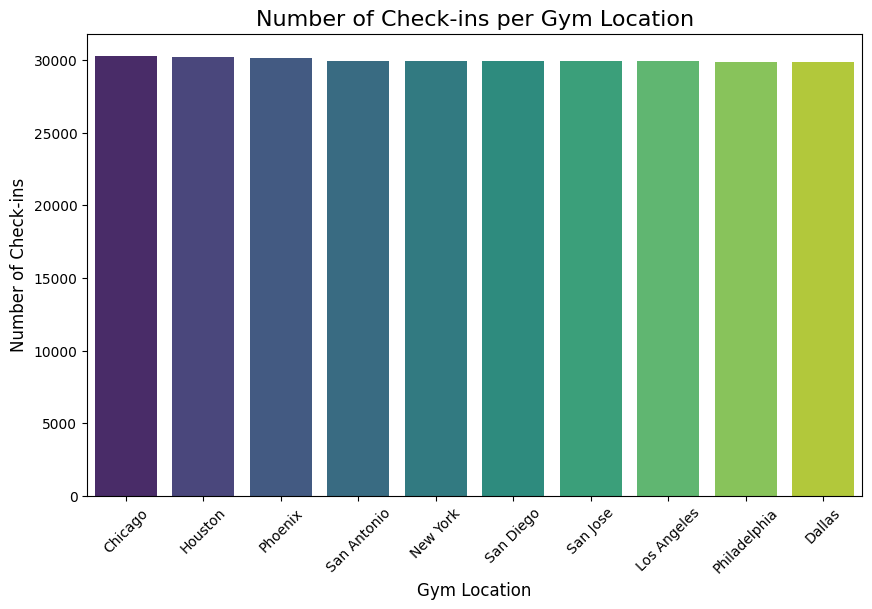

In [6]:
# Example Analysis 1: Check-ins per gym
checkins_per_gym = full_data['location'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=checkins_per_gym.index, y=checkins_per_gym.values, palette="viridis")
plt.title('Number of Check-ins per Gym Location', fontsize=16)
plt.xlabel('Gym Location', fontsize=12)
plt.ylabel('Number of Check-ins', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\Ivo\AppData\Local\Temp\ipykernel_7812\663851541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=checkins_per_gym.index, y=checkins_per_gym.values, palette="viridis")


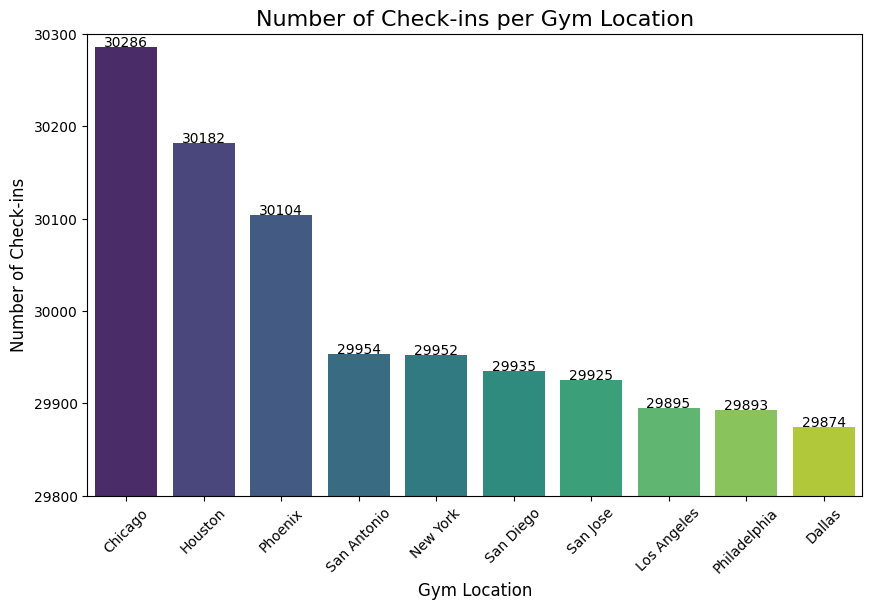

In [7]:
# Example Analysis 1: Check-ins per gym
checkins_per_gym = full_data['location'].value_counts()
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=checkins_per_gym.index, y=checkins_per_gym.values, palette="viridis")
plt.title('Number of Check-ins per Gym Location', fontsize=16)
plt.xlabel('Gym Location', fontsize=12)
plt.ylabel('Number of Check-ins', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(29800, 30300)  # Limit the y-axis to show values between 28000 and 31000

# Add value annotations to the bars
for index, value in enumerate(checkins_per_gym.values):
    if 29000 <= value <= 30500:  # Only annotate values within the visible range
        bar_plot.text(index, value + 0.5, str(value), ha='center', fontsize=10)

plt.show()

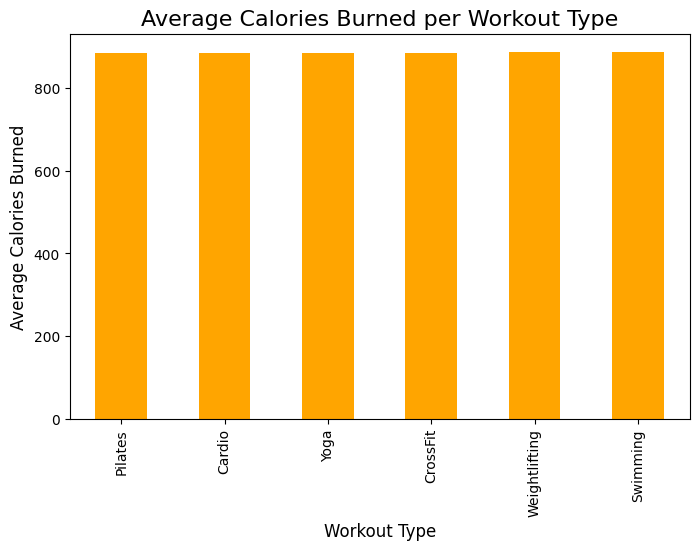

In [8]:
# Example Analysis 2: Average calories burned per workout type
avg_calories_per_workout = full_data.groupby('workout_type')['calories_burned'].mean().sort_values()
plt.figure(figsize=(8, 5))
avg_calories_per_workout.plot(kind='bar', color='orange')
plt.title('Average Calories Burned per Workout Type', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Average Calories Burned', fontsize=12)
plt.show()


C:\Users\Ivo\AppData\Local\Temp\ipykernel_7812\1636686794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_distribution.index, y=subscription_distribution.values, palette="cool")


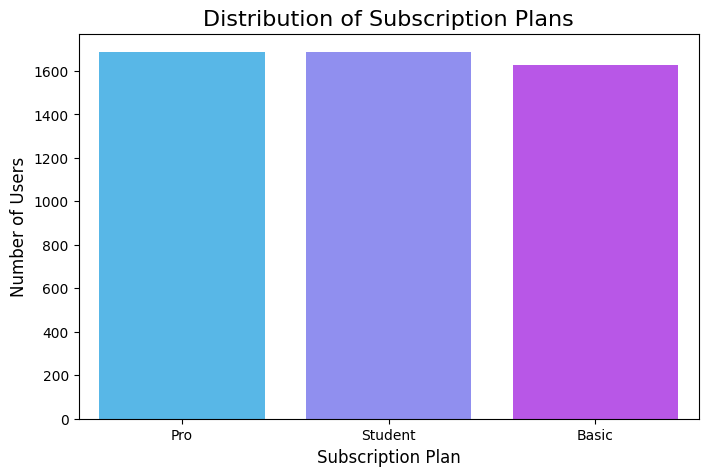

In [9]:
# Example Analysis 3: Subscription Plan Distribution
subscription_distribution = users_data['subscription_plan'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=subscription_distribution.index, y=subscription_distribution.values, palette="cool")
plt.title('Distribution of Subscription Plans', fontsize=16)
plt.xlabel('Subscription Plan', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()

In [10]:
# Example Analysis 4: Correlation Analysis
# Add duration of workout in minutes to the dataset
full_data['checkin_time'] = pd.to_datetime(full_data['checkin_time'])
full_data['checkout_time'] = pd.to_datetime(full_data['checkout_time'])
full_data['duration_minutes'] = (full_data['checkout_time'] - full_data['checkin_time']).dt.total_seconds() / 60

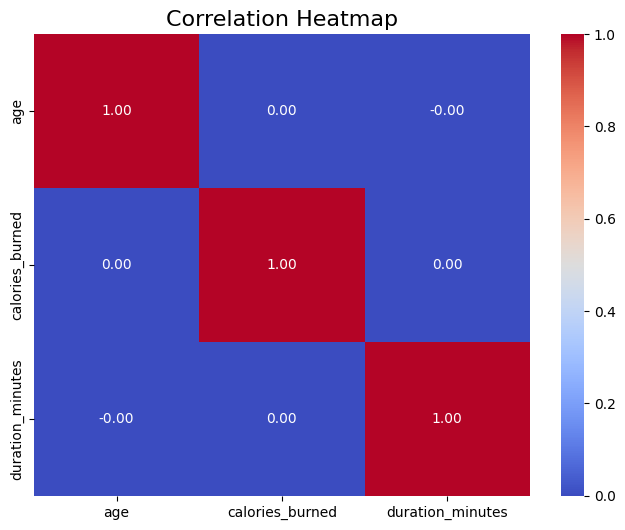

In [11]:
# Plot correlation heatmap for numerical features
correlation_matrix = full_data[['age', 'calories_burned', 'duration_minutes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

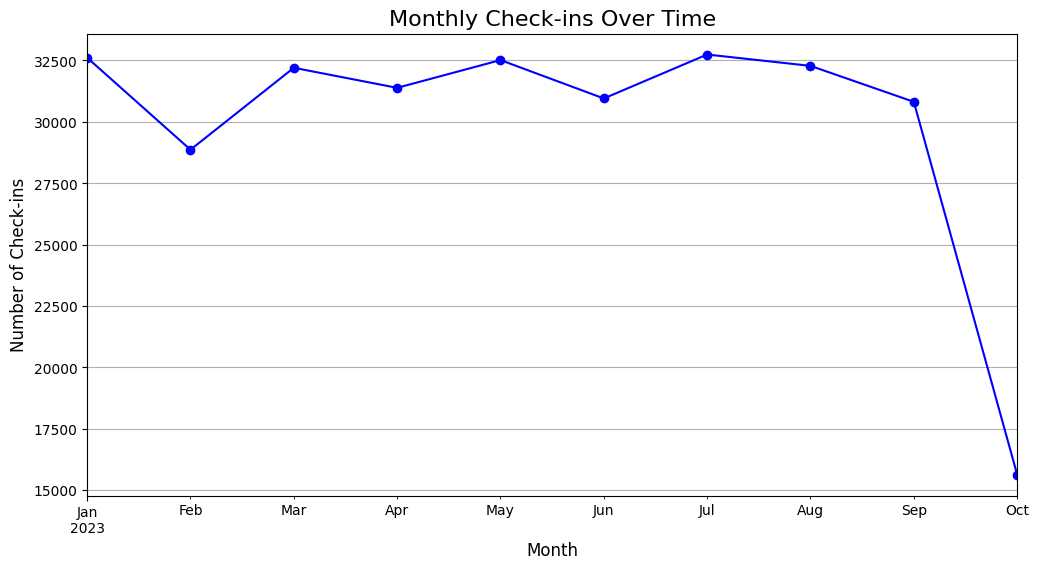

In [12]:
# Example Analysis 5: Monthly Check-ins Analysis
# Extract the month and year from the check-in time
full_data['checkin_month'] = full_data['checkin_time'].dt.to_period('M')
monthly_checkins = full_data.groupby('checkin_month').size()

# Plot the monthly check-ins
plt.figure(figsize=(12, 6))
monthly_checkins.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Check-ins Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Check-ins', fontsize=12)
plt.grid(True)
plt.show()

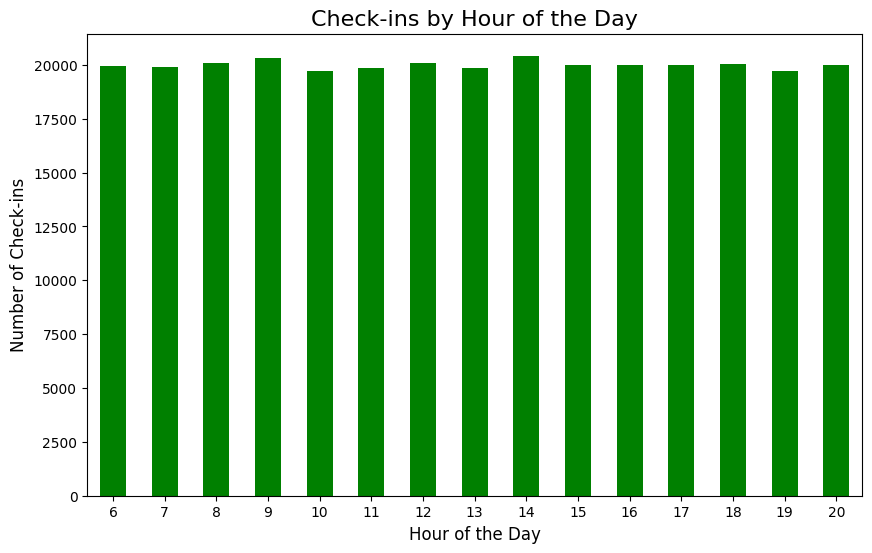

In [13]:
# Example Analysis 6: Peak Hours Analysis
# Extract the hour from the check-in time
full_data['checkin_hour'] = full_data['checkin_time'].dt.hour
peak_hours = full_data['checkin_hour'].value_counts().sort_index()

# Plot the distribution of check-ins by hour
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar', color='green')
plt.title('Check-ins by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Check-ins', fontsize=12)
plt.xticks(rotation=0)
plt.show()

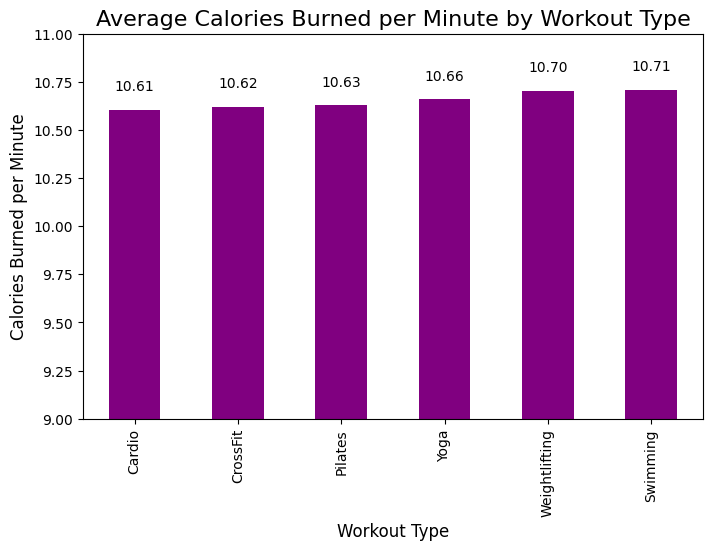

In [14]:
# Example Analysis 7: Efficiency of Calorie Burn by Workout Type
# Calculate calories burned per minute for each entry
full_data['calories_per_minute'] = full_data['calories_burned'] / full_data['duration_minutes']

# Compute the average calories burned per minute for each workout type
avg_calories_per_minute = full_data.groupby('workout_type')['calories_per_minute'].mean().sort_values()

# Plot the results
plt.figure(figsize=(8, 5))
bar_plot = avg_calories_per_minute.plot(kind='bar', color='purple')
plt.title('Average Calories Burned per Minute by Workout Type', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Calories Burned per Minute', fontsize=12)
plt.ylim(9, 11)  # Limit the y-axis to show values between 4 and 10

# Add value annotations to the bars
for index, value in enumerate(avg_calories_per_minute):
    if 9 <= value <= 11:  # Only annotate values within the visible range
        plt.text(index, value + 0.1, f'{value:.2f}', ha='center', fontsize=10)

plt.show()

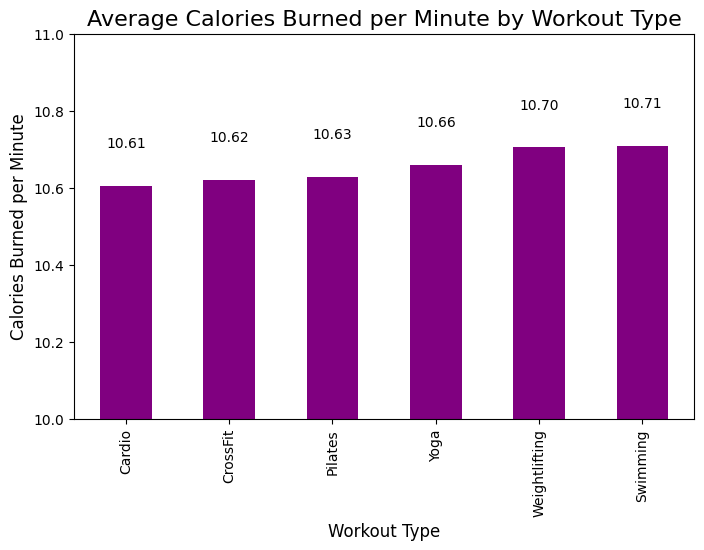

In [15]:
# Example Analysis 7: Efficiency of Calorie Burn by Workout Type
# Calculate calories burned per minute for each entry
full_data['calories_per_minute'] = full_data['calories_burned'] / full_data['duration_minutes']

# Compute the average calories burned per minute for each workout type
avg_calories_per_minute = full_data.groupby('workout_type')['calories_per_minute'].mean().sort_values()

# Plot the results
plt.figure(figsize=(8, 5))
bar_plot = avg_calories_per_minute.plot(kind='bar', color='purple')
plt.title('Average Calories Burned per Minute by Workout Type', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Calories Burned per Minute', fontsize=12)
plt.ylim(10, 11)  # Limit the y-axis to show values between 4 and 10

# Add value annotations to the bars
for index, value in enumerate(avg_calories_per_minute):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', fontsize=10)

plt.show()

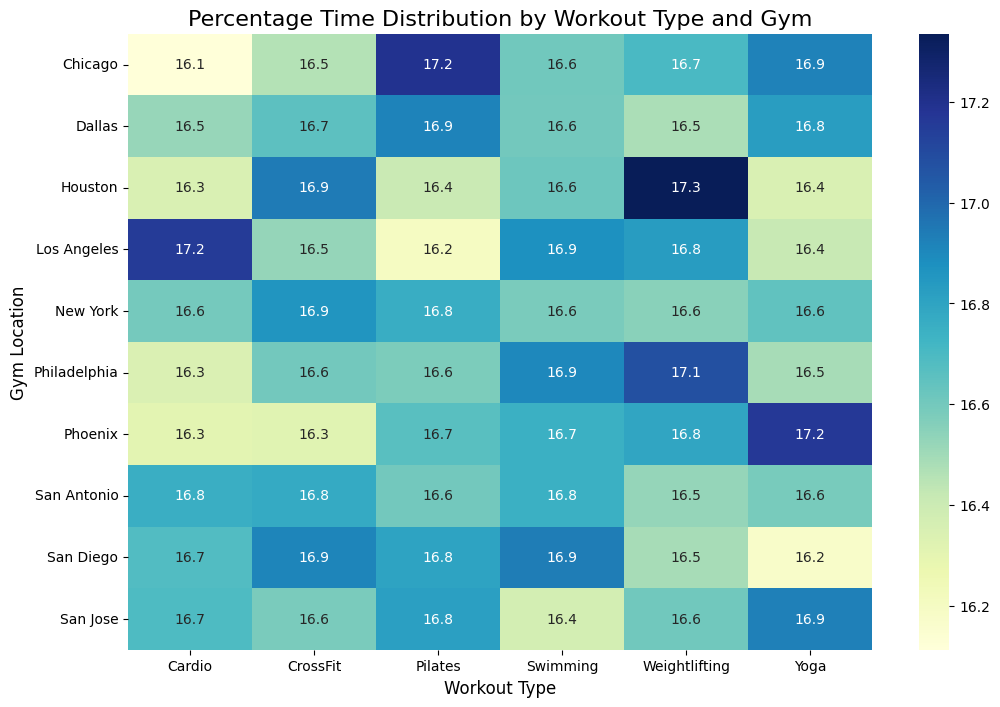

In [16]:
# Example Analysis 8: Percentage Time Distribution by Workout Type and Gym
# Group by gym location and workout type to sum the duration
gym_workout_durations = full_data.groupby(['location', 'workout_type'])['duration_minutes'].sum().reset_index()

# Calculate the percentage of time spent for each workout type in each gym
gym_workout_durations['percentage_time'] = gym_workout_durations.groupby('location')['duration_minutes'].transform(lambda x: (x / x.sum()) * 100)

# Pivot the data for better visualization
pivot_table = gym_workout_durations.pivot(index='location', columns='workout_type', values='percentage_time')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Percentage Time Distribution by Workout Type and Gym', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Gym Location', fontsize=12)
plt.show()

In [17]:
# Hypothesis Testing: Does gym type influence calorie-burning efficiency?
# Filter necessary columns
data_for_analysis = full_data[['gym_type', 'workout_type', 'calories_per_minute']].dropna()

In [18]:
# Group data by gym type and workout type
grouped_data = data_for_analysis.groupby(['gym_type', 'workout_type'])['calories_per_minute'].mean().unstack()
print("Average Calories Burned per Minute by Gym Type and Workout Type:")
print(grouped_data, "\n")

Average Calories Burned per Minute by Gym Type and Workout Type:
workout_type     Cardio   CrossFit    Pilates   Swimming  Weightlifting  \
gym_type                                                                  
Budget        10.577590  10.600594  10.708500  10.600573      10.704314   
Premium       10.591954  10.625683  10.633298  10.764105      10.662200   
Standard      10.680690  10.638884  10.490825  10.732986      10.810743   

workout_type       Yoga  
gym_type                 
Budget        10.634894  
Premium       10.687153  
Standard      10.626377   



In [19]:
# Perform ANOVA test for each workout type
anova_results = {}
for workout in data_for_analysis['workout_type'].unique():
    subsets = [
        data_for_analysis[(data_for_analysis['workout_type'] == workout) & (data_for_analysis['gym_type'] == gym)]['calories_per_minute']
        for gym in data_for_analysis['gym_type'].unique()
    ]
    anova_results[workout] = f_oneway(*subsets)

print("ANOVA Results:")
for workout, result in anova_results.items():
    print(f"Workout: {workout}, F-Statistic: {result.statistic:.2f}, P-Value: {result.pvalue:.4f}")

ANOVA Results:
Workout: Weightlifting, F-Statistic: 1.12, P-Value: 0.3254
Workout: Yoga, F-Statistic: 0.28, P-Value: 0.7560
Workout: Cardio, F-Statistic: 0.53, P-Value: 0.5875
Workout: CrossFit, F-Statistic: 0.07, P-Value: 0.9293
Workout: Swimming, F-Statistic: 1.80, P-Value: 0.1648
Workout: Pilates, F-Statistic: 2.06, P-Value: 0.1277


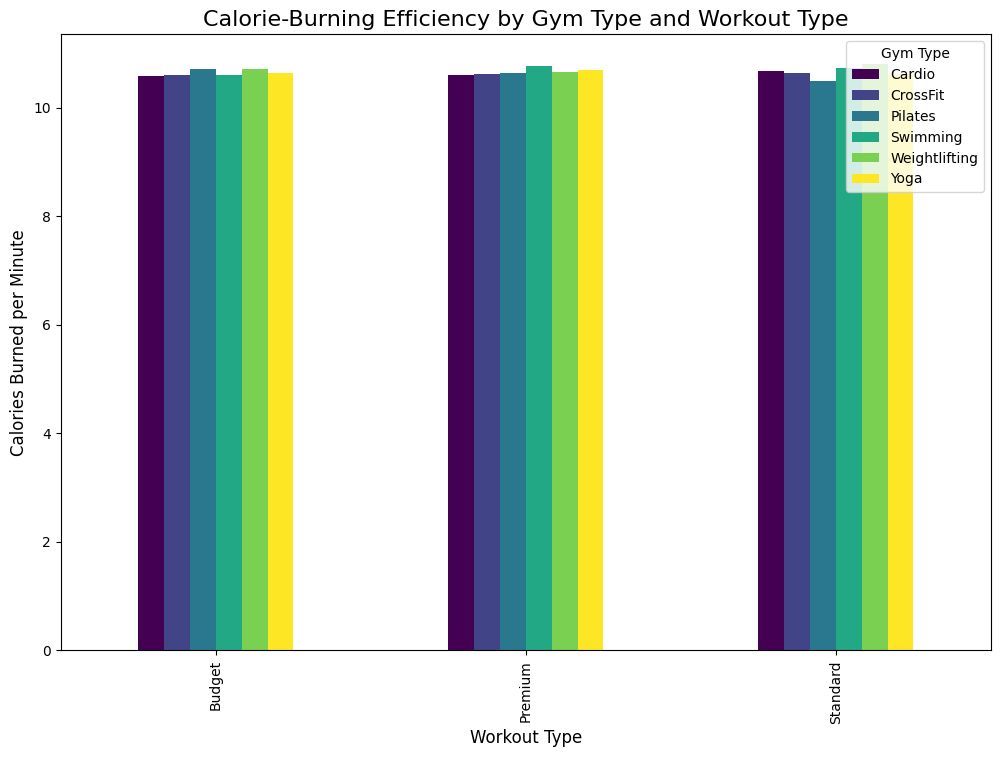

In [20]:
# Visualization of results
grouped_data.plot(kind='bar', figsize=(12, 8), cmap="viridis")
plt.title('Calorie-Burning Efficiency by Gym Type and Workout Type', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Calories Burned per Minute', fontsize=12)
plt.legend(title="Gym Type")
plt.show()

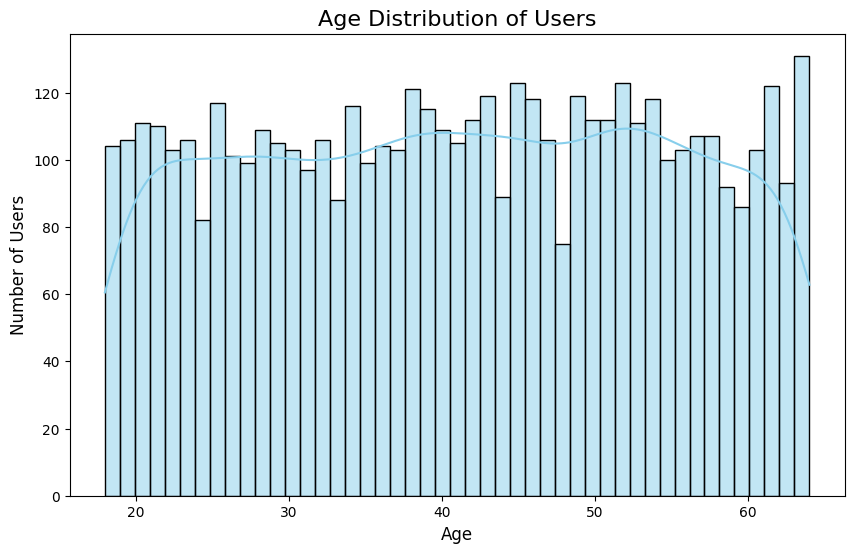

In [21]:
# Example Analysis 9: Age Distribution of Users
plt.figure(figsize=(10, 6))
sns.histplot(users_data['age'], kde=True, bins=47, color='skyblue')
plt.title('Age Distribution of Users', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()


C:\Users\Ivo\AppData\Local\Temp\ipykernel_7812\4027035295.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_workout_summary = age_workout_data.groupby(['age_group', 'workout_type'])['duration_minutes'].sum().reset_index()
C:\Users\Ivo\AppData\Local\Temp\ipykernel_7812\4027035295.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_workout_summary['percentage_time'] = age_workout_summary.groupby('age_group')['duration_minutes'].transform(lambda x: (x / x.sum()) * 100)


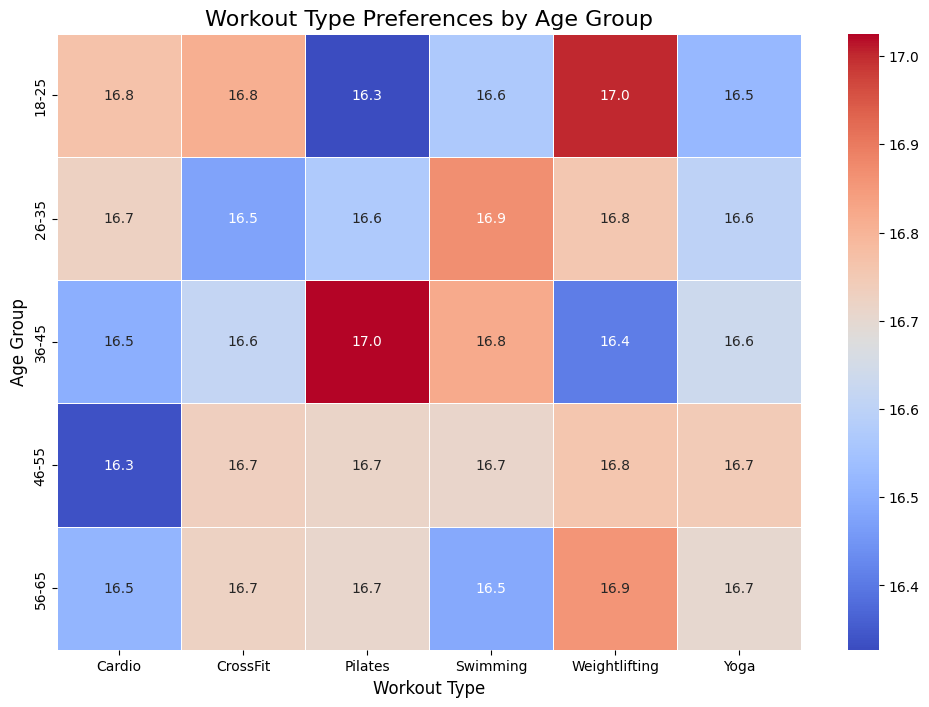

In [22]:
# Добавяне на колоната duration_minutes към checkin_checkout_history
checkin_checkout_history['checkin_time'] = pd.to_datetime(checkin_checkout_history['checkin_time'])
checkin_checkout_history['checkout_time'] = pd.to_datetime(checkin_checkout_history['checkout_time'])
checkin_checkout_history['duration_minutes'] = (
    (checkin_checkout_history['checkout_time'] - checkin_checkout_history['checkin_time']).dt.total_seconds() / 60
)

# Присъединяване на потребителските данни с информацията за тренировките
age_workout_data = checkin_checkout_history.merge(users_data, on='user_id')

# Определяне на възрастовите групи
bins = [18, 25, 35, 45, 55, 65]  # Граници на възрастовите групи
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
age_workout_data['age_group'] = pd.cut(age_workout_data['age'], bins=bins, labels=labels, right=False)

# Пресмятане на прекараното време по типове упражнения за всяка възрастова група
age_workout_summary = age_workout_data.groupby(['age_group', 'workout_type'])['duration_minutes'].sum().reset_index()

# Преобразуване в проценти за по-добра визуализация
age_workout_summary['percentage_time'] = age_workout_summary.groupby('age_group')['duration_minutes'].transform(lambda x: (x / x.sum()) * 100)

# Pivot за визуализация
pivot_table_age_workout = age_workout_summary.pivot(index='age_group', columns='workout_type', values='percentage_time')

# Създаване на heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_age_workout, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title('Workout Type Preferences by Age Group', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.show()

C:\Users\Ivo\AppData\Local\Temp\ipykernel_7812\1710800310.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_efficiency_by_duration = full_data.groupby('workout_duration_category')['calories_per_minute'].mean().reset_index()
C:\Users\Ivo\AppData\Local\Temp\ipykernel_7812\1710800310.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workout_duration_category', y='calories_per_minute', data=avg_efficiency_by_duration, palette="muted")


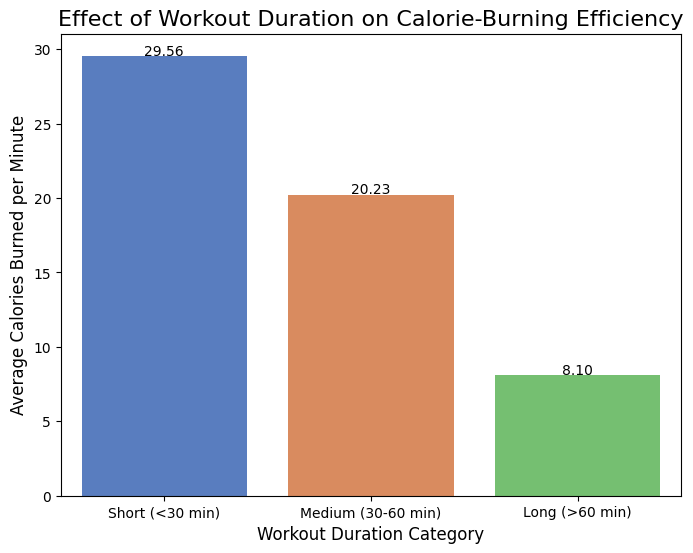

In [23]:
# Example Analysis 10: Effect of Workout Duration on Calorie-Burning Efficiency
# Group data into short, medium, and long workouts based on duration
full_data['workout_duration_category'] = pd.cut(full_data['duration_minutes'], bins=[0, 30, 60, float('inf')], labels=['Short (<30 min)', 'Medium (30-60 min)', 'Long (>60 min)'])

# Calculate average calories burned per minute for each duration category
avg_efficiency_by_duration = full_data.groupby('workout_duration_category')['calories_per_minute'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x='workout_duration_category', y='calories_per_minute', data=avg_efficiency_by_duration, palette="muted")
plt.title('Effect of Workout Duration on Calorie-Burning Efficiency', fontsize=16)
plt.xlabel('Workout Duration Category', fontsize=12)
plt.ylabel('Average Calories Burned per Minute', fontsize=12)

# Add value annotations to the bars
for index, row in avg_efficiency_by_duration.iterrows():
    plt.text(index, row['calories_per_minute'] + 0.05, f'{row["calories_per_minute"]:.2f}', ha='center', fontsize=10)

plt.show()

In [24]:
# можем да разгледаме дължината на тренировките дали има зависимост от тип упражнение, пол, възрастова група